## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('data_academic_performance.xlsx')

In [3]:
df.sample(10)

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
10691,SB11201320511301,M,Incomplete Professional Education,Complete professional education,Small entrepreneur,Small entrepreneur,Stratum 5,It is not classified by the SISBEN,Four,NaN,...,61,99,92,186,186,94,5,4,4,4
10518,SB11201320484174,F,Incomplete technical or technological,Postgraduate education,Executive,Executive,Stratum 3,It is not classified by the SISBEN,Five,NaN,...,81,63,92,196,182,92,5,4,4,2
498,SB11201220031086,F,Incomplete Secundary,Complete professional education,Independent,Technical or professional level employee,Stratum 2,It is not classified by the SISBEN,Four,NaN,...,72,96,57,163,174,87,5,4,2,1
7540,SB11201320189120,M,Complete professional education,Complete professional education,Independent professional,Technical or professional level employee,Stratum 3,It is not classified by the SISBEN,Four,NaN,...,68,76,19,169,154,63,4,3,4,2
3898,SB11201220527894,M,Incomplete Secundary,Incomplete Secundary,Independent,Independent,Stratum 3,Level 3,Seven,NaN,...,6,23,16,124,128,21,2,1,2,2
6380,SB11201320099461,M,Incomplete primary,Incomplete Secundary,Independent,Home,Stratum 1,Level 1,Once,NaN,...,24,87,60,149,158,69,4,3,1,1
2531,SB11201220332141,M,Complete Secundary,Complete professional education,Independent,Technical or professional level employee,Stratum 2,Level 1,Five,NaN,...,52,84,73,158,166,78,4,4,4,2
5921,SB11201320071659,M,Complete primary,Complete primary,Executive,Executive,Stratum 2,Level 2,Four,NaN,...,25,80,48,148,151,58,3,3,1,1
6712,SB11201320126527,M,Complete Secundary,Complete Secundary,Retired,Home,Stratum 2,It is not classified by the SISBEN,Seven,NaN,...,76,82,7,76,169,82,5,4,2,2
9801,SB11201320404067,F,Complete technique or technology,Complete technique or technology,Entrepreneur,Technical or professional level employee,Stratum 3,It is not classified by the SISBEN,Four,NaN,...,74,29,48,128,144,47,3,2,3,1


In [4]:
df.isnull().sum()

COD_S11                 0
GENDER                  0
EDU_FATHER              0
EDU_MOTHER              0
OCC_FATHER              0
OCC_MOTHER              0
STRATUM                 0
SISBEN                  0
PEOPLE_HOUSE            0
Unnamed: 9          12411
INTERNET                0
TV                      0
COMPUTER                0
WASHING_MCH             0
MIC_OVEN                0
CAR                     0
DVD                     0
FRESH                   0
PHONE                   0
MOBILE                  0
REVENUE                 0
JOB                     0
SCHOOL_NAME             0
SCHOOL_NAT              0
SCHOOL_TYPE             0
MAT_S11                 0
CR_S11                  0
CC_S11                  0
BIO_S11                 0
ENG_S11                 0
Cod_SPro                0
UNIVERSITY              0
ACADEMIC_PROGRAM        0
QR_PRO                  0
CR_PRO                  0
CC_PRO                  0
ENG_PRO                 0
WC_PRO                  0
FEP_PRO     

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(columns=['Unnamed: 9'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COD_S11           12411 non-null  object
 1   GENDER            12411 non-null  object
 2   EDU_FATHER        12411 non-null  object
 3   EDU_MOTHER        12411 non-null  object
 4   OCC_FATHER        12411 non-null  object
 5   OCC_MOTHER        12411 non-null  object
 6   STRATUM           12411 non-null  object
 7   SISBEN            12411 non-null  object
 8   PEOPLE_HOUSE      12411 non-null  object
 9   INTERNET          12411 non-null  object
 10  TV                12411 non-null  object
 11  COMPUTER          12411 non-null  object
 12  WASHING_MCH       12411 non-null  object
 13  MIC_OVEN          12411 non-null  object
 14  CAR               12411 non-null  object
 15  DVD               12411 non-null  object
 16  FRESH             12411 non-null  object
 17  PHONE       

In [8]:
missing_saber_pro = df[df['Cod_SPro'].isna() | (df['Cod_SPro'] == '') | (df['Cod_SPro'] == 0)]

print(f"Number of records with missing SABER PRO IDs: {len(missing_saber_pro)}")
print("\nSample of records with missing SABER PRO IDs:")
print(missing_saber_pro.head())

saber11_duplicates = df[df.duplicated(subset=['COD_S11'], keep=False)]
print(f"\nNumber of records with duplicate SABER 11 IDs: {len(saber11_duplicates)}")
if len(saber11_duplicates) > 0:
    print("\nSample of duplicate SABER 11 ID records:")
    print(saber11_duplicates.sort_values('COD_S11').head())

saberpro_duplicates = df[df.duplicated(subset=['Cod_SPro'], keep=False)]
print(f"\nNumber of records with duplicate SABER PRO IDs: {len(saberpro_duplicates)}")
if len(saberpro_duplicates) > 0:
    print("\nSample of duplicate SABER PRO ID records:")
    print(saberpro_duplicates.sort_values('Cod_SPro').head())

def keep_most_recent_record():
    duplicate_mask = df.duplicated(subset=['Cod_SPro'], keep=False)
    duplicates = df[duplicate_mask].copy()
    non_duplicates = df[~duplicate_mask].copy()
    duplicates['S11_Year'] = duplicates['COD_S11'].str[4:8].astype(int)
    
    keep_rows = []
    for saber_pro_id, group in duplicates.groupby('Cod_SPro'):
        most_recent = group.loc[group['S11_Year'].idxmax()]
        keep_rows.append(most_recent)
    
    filtered_df = pd.concat([non_duplicates, pd.DataFrame(keep_rows)])
    
    if 'S11_Year' in filtered_df.columns:
        filtered_df = filtered_df.drop(columns=['S11_Year'])
    
    return filtered_df
df = keep_most_recent_record()
print(f"Filtered DataFrame shape: {df.shape}")

Number of records with missing SABER PRO IDs: 0

Sample of records with missing SABER PRO IDs:
Empty DataFrame
Columns: [COD_S11, GENDER, EDU_FATHER, EDU_MOTHER, OCC_FATHER, OCC_MOTHER, STRATUM, SISBEN, PEOPLE_HOUSE, INTERNET, TV, COMPUTER, WASHING_MCH, MIC_OVEN, CAR, DVD, FRESH, PHONE, MOBILE, REVENUE, JOB, SCHOOL_NAME, SCHOOL_NAT, SCHOOL_TYPE, MAT_S11, CR_S11, CC_S11, BIO_S11, ENG_S11, Cod_SPro, UNIVERSITY, ACADEMIC_PROGRAM, QR_PRO, CR_PRO, CC_PRO, ENG_PRO, WC_PRO, FEP_PRO, G_SC, PERCENTILE, 2ND_DECILE, QUARTILE, SEL, SEL_IHE]
Index: []

[0 rows x 44 columns]

Number of records with duplicate SABER 11 IDs: 0

Number of records with duplicate SABER PRO IDs: 32

Sample of duplicate SABER PRO ID records:
               COD_S11 GENDER                             EDU_FATHER  \
6524  SB11201320110284      M  Incomplete technical or technological   
2259  SB11201220313289      M                                      0   
8035  SB11201320225581      F      Incomplete Professional Education   

In [9]:
df.rename(columns={'MAT_S11': 'Math_S11',
                   'CR_S11': 'Critical Reading_S11', 
                   'CC_S11': 'Citizen Competencies_S11',
                   'BIO_S11': 'Biology_S11', 
                   'ENG_S11': 'English_S11',
                   'QR_PRO': 'Quantitative Reasoning_PRO',
                   'CR_PRO': 'Critical Reading_PRO',
                   'CC_PRO': 'Citizen Competencies_PRO',
                   'ENG_PRO': 'English_PRO',
                   'WC_PRO': 'Written Communication_PRO',
                   'FEP_PRO': 'Formulation of Engineering Projects_PRO',
                   'SEL': 'Socioeconomic Level',
                   'SEL_IHE': 'Socioeconomic Level of The Institution of Higher Education'}, inplace=True)

In [10]:
df.describe()

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,Socioeconomic Level,Socioeconomic Level of The Institution of Higher Education
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,64.326261,60.782896,60.709238,63.958935,61.804599,77.419766,62.214603,59.200726,67.504316,53.723921,145.495200,162.724002,68.461880,3.886325,3.189351,2.598790,2.409359
std,11.876539,10.026175,10.121873,11.155950,14.300620,22.678590,27.657494,28.989655,25.488274,29.993318,40.131322,23.109625,25.862181,1.248166,0.978822,1.111929,0.926930
min,26.000000,24.000000,0.000000,11.000000,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,56.000000,54.000000,54.000000,56.000000,50.000000,65.000000,42.000000,36.000000,51.000000,28.000000,124.000000,147.000000,51.000000,3.000000,3.000000,2.000000,2.000000
50%,64.000000,61.000000,60.000000,64.000000,59.000000,85.000000,67.000000,65.000000,74.000000,56.000000,153.000000,163.000000,75.000000,4.000000,4.000000,2.000000,2.000000
75%,72.000000,67.000000,67.000000,71.000000,72.000000,96.000000,86.000000,85.000000,88.000000,80.000000,174.000000,179.000000,90.000000,5.000000,4.000000,4.000000,3.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,247.000000,100.000000,5.000000,4.000000,4.000000,4.000000


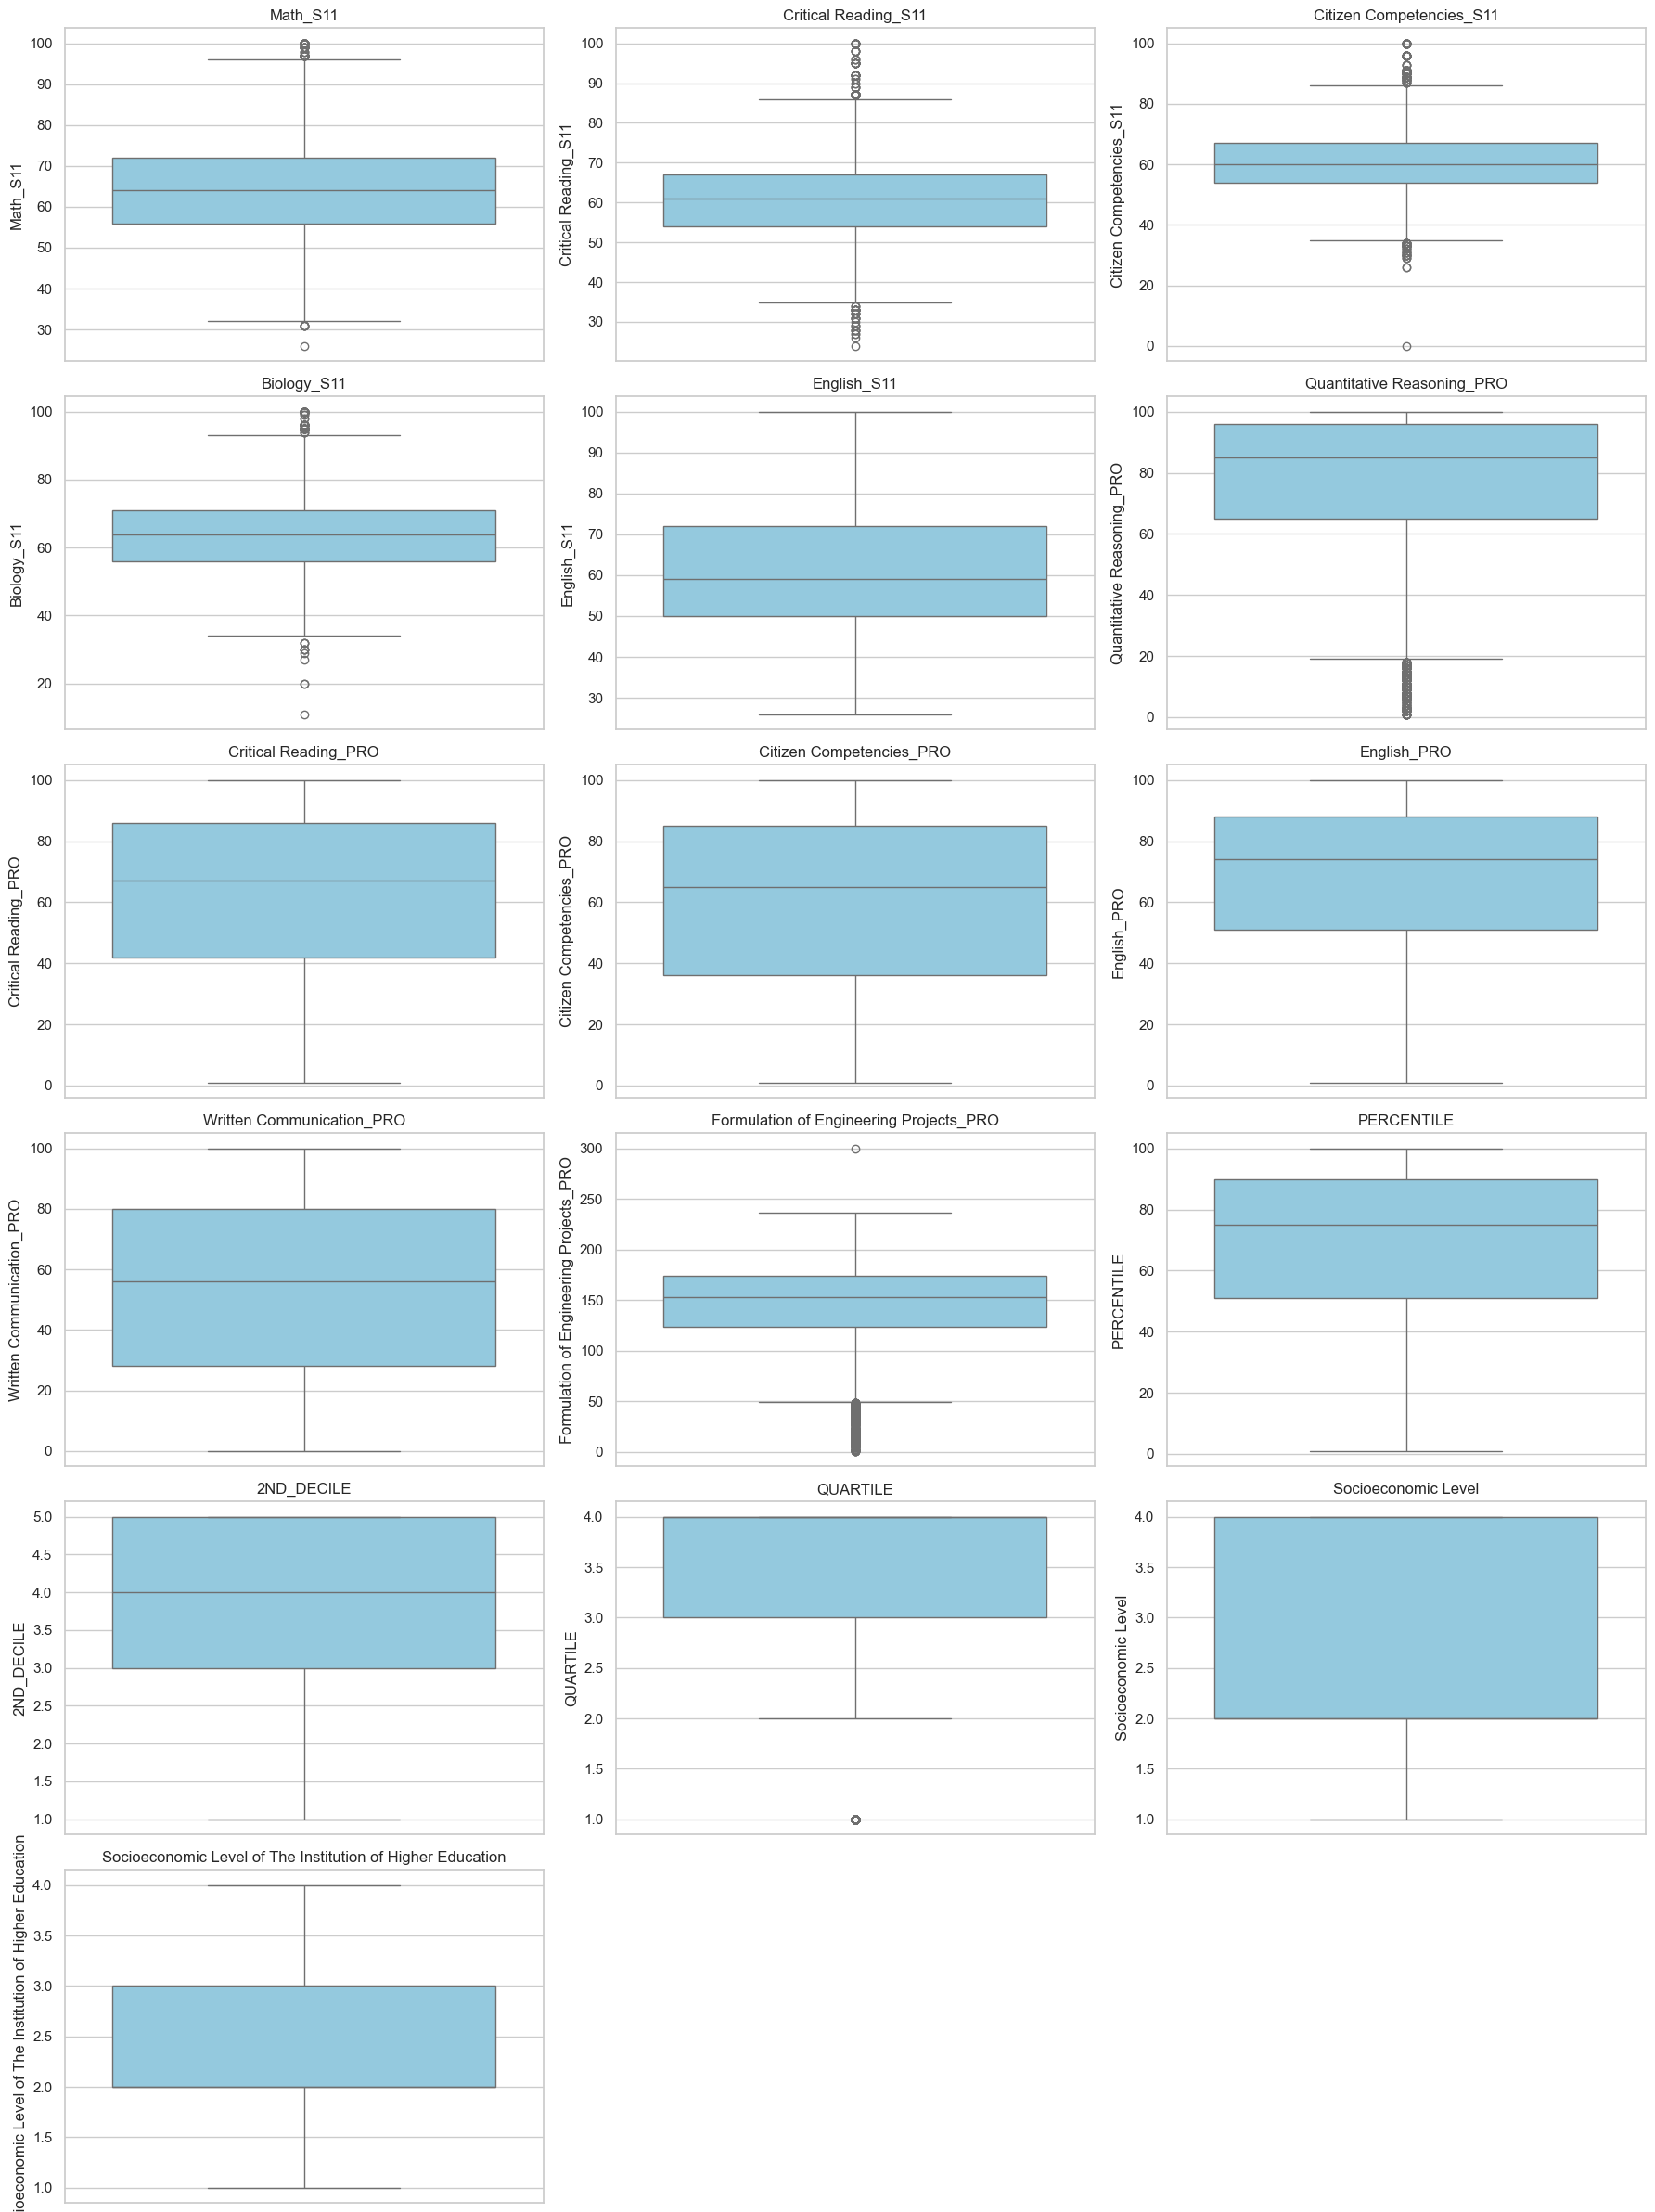

In [11]:
numeric_columns = [
    "Math_S11", "Critical Reading_S11", "Citizen Competencies_S11", "Biology_S11", "English_S11",
    "Quantitative Reasoning_PRO", "Critical Reading_PRO", "Citizen Competencies_PRO", "English_PRO",
    "Written Communication_PRO", "Formulation of Engineering Projects_PRO", "PERCENTILE",
    "2ND_DECILE", "QUARTILE", "Socioeconomic Level",
    "Socioeconomic Level of The Institution of Higher Education"
]

sns.set(style="whitegrid")

def plot_boxplots(df, numeric_columns):
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 2) // 3  # Adjust rows based on number of plots

    plt.figure(figsize=(18, num_rows * 4))

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(data=df, y=col, color="skyblue")
        plt.title(col)
        plt.tight_layout()

    plt.show()

plot_boxplots(df, numeric_columns)


In [12]:
from functools import reduce

def get_unique_value_counts_df(df, columns):
    value_counts_dfs = []
    
    for col in columns:
        counts_df = (
            df[col]
            .value_counts(dropna=True)
            .reset_index()
            .rename(columns={'index': f'{col}', col: f'{col}_COUNT'})
        )
        value_counts_dfs.append(counts_df)
   
    merged_df = pd.concat(value_counts_dfs, axis=1)

    return merged_df


In [13]:
columns_to_check = ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER']
nan_counts = df[columns_to_check].isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
EDU_FATHER    0
EDU_MOTHER    0
OCC_FATHER    0
OCC_MOTHER    0
dtype: int64


In [14]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])


,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015,Complete Secundary,3106,Independent,2907,Home,4650
1,Complete Secundary,2842,Complete professional education,3059,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193,Complete technique or technology,1493,Operator,1537,Independent,1107
3,Incomplete Secundary,1091,Incomplete Secundary,1056,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084,Postgraduate education,995,Executive,1076,Executive,793
5,Complete primary,823,Complete primary,712,0,928,Independent professional,715
6,Incomplete primary,731,Incomplete primary,538,Independent professional,914,Operator,684
7,Incomplete Professional Education,425,Incomplete Professional Education,502,Small entrepreneur,692,Other occupation,607
8,Not sure,407,0,380,Retired,532,Small entrepreneur,492
9,0,384,Incomplete technical or technological,341,Entrepreneur,471,0,306


In [15]:
df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)

df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)

df['OCC_FATHER'] = df['OCC_FATHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)
df['OCC_MOTHER'] = df['OCC_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)


In [16]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])

,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015.0,Complete Secundary,3106.0,Independent,2907,Home,4650
1,Complete Secundary,2842.0,Complete professional education,3059.0,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193.0,Complete technique or technology,1493.0,Operator,1537,Independent,1107
3,Incomplete Secundary,1091.0,Incomplete Secundary,1056.0,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084.0,Postgraduate education,995.0,Executive,1076,Executive,793
5,Complete primary,823.0,Complete primary,712.0,Unknown,928,Independent professional,715
6,Unknown,791.0,Unknown,559.0,Independent professional,914,Operator,684
7,Incomplete primary,731.0,Incomplete primary,538.0,Small entrepreneur,692,Other occupation,607
8,Incomplete Professional Education,425.0,Incomplete Professional Education,502.0,Retired,532,Small entrepreneur,492
9,Incomplete technical or technological,277.0,Incomplete technical or technological,341.0,Entrepreneur,471,Unknown,306


In [17]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,It is not classified by the SISBEN,7521.0,Stratum 3,4038
1,Level 2,2118.0,Stratum 2,4026
2,Level 1,2056.0,Stratum 1,1707
3,Level 3,583.0,Stratum 4,1575
4,Esta clasificada en otro Level del SISBEN,96.0,Stratum 5,632
5,0,21.0,Stratum 6,403
6,NaN,NaN,0,14


In [18]:
def handle_sisben(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str):
        x = x.strip().lower()
        if x == '0' or 'it is not classified by the sisben' in x or 'esta clasificada en otro level del sisben' in x:
            return 'Unknown'
    return x

def handle_stratum(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str) and x.strip() == '0':
        return 'Unknown'
    return x

df['SISBEN'] = df['SISBEN'].apply(handle_sisben)
df['STRATUM'] = df['STRATUM'].apply(handle_stratum)

In [19]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,Unknown,7638.0,Stratum 3,4038
1,level 2,2118.0,Stratum 2,4026
2,level 1,2056.0,Stratum 1,1707
3,level 3,583.0,Stratum 4,1575
4,NaN,NaN,Stratum 5,632
5,NaN,NaN,Stratum 6,403
6,NaN,NaN,Unknown,14


In [20]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,0,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,0,276.0,NaN,NaN,NaN,NaN,Nueve,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,Twelve or more,32


In [21]:
df['JOB'] = df['JOB'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )
df['REVENUE'] = df['REVENUE'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )

df = df[df['PEOPLE_HOUSE'] != '0']

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Nueve': 'Nine'})

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Once': 'eleven'})

In [22]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,Unknown,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,Unknown,276.0,NaN,NaN,NaN,NaN,Nine,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,Twelve or more,32


In [23]:
import re

# Extract name and city using regex
df[['University', 'City']] = df['UNIVERSITY'].str.extract(r'^(.*?)(?:\s*[-–]{1,2}\s*|\s+)([A-ZÁÉÍÓÚÑ\s\.]+)$')

# Optional: Clean spaces
df['University'] = df['University'].str.strip()
df['City'] = df['City'].str.strip()

df


,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,...,Written Communication_PRO,Formulation of Engineering Projects_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,Socioeconomic Level,Socioeconomic Level of The Institution of Higher Education,University,City
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,Unknown,Three,Yes,...,79,181,180,91,5,4,2,2,UNIVERSIDAD DE SANTANDER - UDES,BUCARAMANGA
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,Unknown,Three,Yes,...,78,201,182,92,5,4,4,4,UNIVERSIDAD DE LOS ANDES,BOGOTÁ D.C.
2,SB11201210005154,M,Unknown,Unknown,Independent,Home,Stratum 2,level 2,Five,No,...,22,113,113,7,1,1,1,1,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD,BOGOTÁ D.C.
3,SB11201210007504,F,Unknown,Unknown,Other occupation,Independent,Stratum 2,Unknown,Three,Yes,...,48,137,157,67,4,3,2,2,UNIVERSIDAD CATOLICA DE PEREIRA,PEREIRA
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,Unknown,One,Yes,...,71,189,198,98,5,4,4,2,UNIVERSIDAD INDUSTRIAL DE SANTANDER,BUCARAMANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,SB11201310056691,M,Complete Secundary,Complete technique or technology,Unknown,Home,Stratum 1,level 2,Five,Yes,...,9,137,111,6,1,1,1,2,FUNDACION UNIVERSITARIA INTERNACIONAL DEL TROP...,YOPAL
4424,SB11201310012059,F,Complete technique or technology,Complete technique or technology,Unknown,Home,Stratum 3,Unknown,Four,Yes,...,15,156,154,62,4,3,2,2,UNIVERSIDAD DE SAN BUENAVENTURA,CALI
4636,SB11201310057554,F,Complete professional education,Incomplete Professional Education,Unknown,Home,Stratum 5,Unknown,Five,Yes,...,12,110,128,22,2,1,3,2,CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA,NEIVA
11438,SB11201410032085,F,Complete Secundary,Complete Secundary,Small entrepreneur,Small entrepreneur,Stratum 2,level 2,Three,Yes,...,15,147,146,50,3,3,2,2,CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA,NEIVA


In [24]:
df.drop(columns=['UNIVERSITY'], inplace=True)

In [25]:
university_by_city = df.groupby('University')['City'].first().reset_index()
print("Universities by City:")
print(university_by_city.sort_values('City'))

Universities by City:
                                            University           City
16   CORPORACION UNIVERSITARIA EMPRESARIAL ALEXANDE...        ARMENIA
21   ESCUELA DE ADMINISTRACION Y MERCADOTECNIA DEL ...        ARMENIA
84                             UNIVERSIDAD DEL QUINDIO        ARMENIA
57                     UNIVERSIDAD AUTONOMA DEL CARIBE   BARRANQUILLA
80                           UNIVERSIDAD DEL ATLANTICO   BARRANQUILLA
..                                                 ...            ...
64                   UNIVERSIDAD DE BOYACA - UNIBOYACA          TUNJA
106                      UNIVERSIDAD POPULAR DEL CESAR     VALLEDUPAR
15                  CORPORACION UNIVERSITARIA DEL META  VILLAVICENCIO
73                           UNIVERSIDAD DE LOS LLANOS  VILLAVICENCIO
35   FUNDACION UNIVERSITARIA INTERNACIONAL DEL TROP...          YOPAL

[116 rows x 2 columns]


#### Encoding

In [26]:
def apply_binning_to_dataframe(df):
  
    # Make a copy to avoid modifying the original
    result_df = df.copy()

    # Apply education binning
    result_df['EDU_FATHER_BIN'] = result_df['EDU_FATHER'].apply(bin_education_level)
    result_df['EDU_MOTHER_BIN'] = result_df['EDU_MOTHER'].apply(bin_education_level)

    # Apply occupation binning
    result_df['OCC_FATHER_BIN'] = result_df['OCC_FATHER'].apply(bin_occupation)
    result_df['OCC_MOTHER_BIN'] = result_df['OCC_MOTHER'].apply(bin_occupation)

    return result_df


def bin_education_level(education_str):
    """
    Bins education levels into 6 categories:
    0 - No/Unknown Education
    1 - Primary
    2 - Secondary
    3 - Technical/Technological
    4 - University/Professional
    5 - Postgraduate
    """
    # Input already preprocessed
    education = str(education_str)

    # 0 - No/Unknown Education
    if 'no education' in education.lower() or 'unknown' in education.lower():
        return 0

    # 1 - Primary
    if 'primary' in education.lower():
        return 1

    # 2 - Secondary
    if 'secondary' in education.lower():
        return 2

    # 3 - Technical/Technological
    if 'techn' in education.lower():
        return 3

    # 4 - University/Professional
    if 'professional' in education.lower():
        return 4

    # 5 - Postgraduate
    if 'postgraduate' in education.lower():
        return 5

    # Default to 0 for any unrecognized values
    return 0

def bin_occupation(occupation_str):
    """
    Bins occupation levels into categories:
    0 - Unknown/Missing
    1 - Home/Retired
    2 - Manual Labor (Operator, Small entrepreneur)
    3 - Administrative/Auxiliary
    4 - Technical/Professional
    5 - Executive/Management
    """
    # Input already preprocessed
    occupation = str(occupation_str)
    # 0 - Unknown/Missing
    if occupation.lower() == 'unknown':
        return 0

    # 1 - Home/Retired
    if 'home' in occupation.lower() or 'retired' in occupation.lower():
        return 1

    # 2 - Manual Labor
    if 'operator' in occupation.lower() or 'entrepreneur' in occupation.lower():
        return 2

    # 3 - Administrative/Auxiliary
    if 'admin' in occupation.lower() or 'auxiliary' in occupation.lower():
        return 3

    # 4 - Technical/Professional
    if 'technical' in occupation.lower() or 'professional' in occupation.lower():
        return 4

    # 5 - Executive/Management
    if 'executive' in occupation.lower():
        return 5

    # Default value for other occupations
    return 0

# Apply binning directly to the dataframe columns
df['EDU_FATHER_BIN'] = df['EDU_FATHER'].apply(bin_education_level)
df['EDU_MOTHER_BIN'] = df['EDU_MOTHER'].apply(bin_education_level)
df['OCC_FATHER_BIN'] = df['OCC_FATHER'].apply(bin_occupation)
df['OCC_MOTHER_BIN'] = df['OCC_MOTHER'].apply(bin_occupation)

# Example usage
# Assuming df is your dataframe with the columns 'EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'
df = apply_binning_to_dataframe(df)


In [27]:
df = df.drop(columns=['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER', 'Cod_SPro', 'COD_S11'])

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def analyze_correlations(df):
    target = 'G_SC'

    one_hot_prefixes = [
        'STRATUM_', 'SISBEN_', 'REVENUE_', 'JOB_', 'SCHOOL_TYPE_', 'SCHOOL_NAT_','EDU_FATHER_', 'EDU_MOTHER_',
        'OCC_FATHER_', 'OCC_MOTHER_'
    ]

    # Separate regular features and one-hot features
    one_hot_columns = []
    for prefix in one_hot_prefixes:
        one_hot_columns.extend([col for col in df.columns if col.startswith(prefix)])

    # Regular numerical features 
    regular_numeric = [col for col in df.columns if col not in one_hot_columns
                       and col not in ['G_SC','PERCENTILE', '2ND_DECILE', 'QUARTILE', 'Socioeconomic Level',
                                        'Socioeconomic Level of The Institution of Higher Education']
                       and df[col].dtype in ['int64', 'float64']
                       and col != target]

    #  Correlation of regular numerical features with target
    numeric_corr = df[regular_numeric + [target]].corr()[target].sort_values(ascending=False)

    #  For one-hot encoded features
    category_correlations = {}

    for prefix in one_hot_prefixes:
        cols = [col for col in df.columns if col.startswith(prefix)]
        if cols:
            # Create a categorical variable from one-hot encodings
            # We'll use the column name as the category value
            cat_values = []
            for _, row in df[cols].iterrows():
                # Find which column has 1 (which category this row belongs to)
                try:
                    cat_col = cols[np.where(row == 1)[0][0]]
                    # Extract category name from column name
                    cat_values.append(cat_col.replace(prefix, ''))
                except IndexError:
                    # Handle case where no category is 1 (shouldn't happen with proper one-hot)
                    cat_values.append('Unknown')

            # Create a temporary column with the categorical variable
            temp_col = f"TEMP_{prefix.strip('_')}"
            df[temp_col] = cat_values

            # Calculate eta correlation (correlation ratio) using ANOVA
            categories = df[temp_col].unique()
            overall_mean = df[target].mean()
            total_variance = ((df[target] - overall_mean) ** 2).sum()

            between_group_variance = 0
            for cat in categories:
                cat_values = df[df[temp_col] == cat][target]
                cat_mean = cat_values.mean()
                between_group_variance += len(cat_values) * ((cat_mean - overall_mean) ** 2)

            # Correlation ratio 
            eta_squared = between_group_variance / total_variance if total_variance > 0 else 0
            category_correlations[prefix.strip('_')] = eta_squared

            # Remove temporary column
            df.drop(temp_col, axis=1, inplace=True)

    plt.figure(figsize=(12, 10))

    #  Top regular features by correlation
    top_n = min(15, len(numeric_corr))
    top_corr = numeric_corr.iloc[:top_n]

    plt.subplot(2, 1, 1)
    sns.barplot(x=top_corr.values, y=top_corr.index)
    plt.title(f'Top {top_n} Regular Features by Correlation with G_SC')
    plt.xlabel('Correlation (Pearson)')
    plt.tight_layout()

    # Category correlation ratio (sorted)
    plt.subplot(2, 1, 2)
    cat_df = pd.Series(category_correlations).sort_values(ascending=False)
    sns.barplot(x=cat_df.values, y=cat_df.index)
    plt.title('Categorical Features Association with G_SC (Eta Squared)')
    plt.xlabel('Association Strength (Eta Squared)')
    plt.tight_layout()

    plt.subplots_adjust(hspace=0.3)
    plt.savefig('correlation_analysis.png')
    plt.close()

    # Correlation heatmap for top regular features
    plt.figure(figsize=(12, 10))
    top_features = list(top_corr.iloc[:min(10, len(top_corr))].index) + [target]
    sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Top Features with G_SC')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.close()

    return {
        'regular_correlations': numeric_corr.to_dict(),
        'categorical_associations': category_correlations
    }

#  Test for multicollinearity among PRO and S11 features
def analyze_test_correlations(df):
    pro_features = [col for col in df.columns if col.endswith('_PRO')]
    s11_features = [col for col in df.columns if col.endswith('_S11')]

    if pro_features and s11_features:
        # Correlation between similar tests
        matched_features = []
        for pro in pro_features:
            base_name = pro.replace('_PRO', '')
            s11_match = f"{base_name}_S11"
            if s11_match in s11_features:
                matched_features.append((pro, s11_match))

        if matched_features:
            plt.figure(figsize=(10, 6))
            correlations = []
            labels = []

            for pro, s11 in matched_features:
                corr = df[pro].corr(df[s11])
                correlations.append(corr)
                labels.append(pro.replace('_PRO', ''))

            sns.barplot(x=correlations, y=labels)
            plt.title('Correlation Between SABER PRO and SABER 11 Matched Tests')
            plt.xlabel('Correlation Coefficient')
            plt.tight_layout()
            plt.savefig('pro_s11_correlations.png')
            plt.close()

            # Check how both tests correlate with G_SC
            plt.figure(figsize=(10, 8))

            pro_g_corrs = []
            s11_g_corrs = []

            for pro, s11 in matched_features:
                pro_g_corrs.append(df[pro].corr(df['G_SC']))
                s11_g_corrs.append(df[s11].corr(df['G_SC']))

            corr_df = pd.DataFrame({
                'PRO': pro_g_corrs,
                'S11': s11_g_corrs
            }, index=[name.replace('_PRO', '') for name, _ in matched_features])

            corr_df.plot(kind='bar', figsize=(10, 6))
            plt.title('Correlation with G_SC: SABER PRO vs SABER 11')
            plt.xlabel('Test Component')
            plt.ylabel('Correlation with G_SC')
            plt.legend(title='Exam Type')
            plt.tight_layout()
            plt.savefig('pro_s11_g_sc_comparison.png')
            plt.close()

    plt.figure(figsize=(10, 8))
    sns.heatmap(df[pro_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of SABER PRO Features')
    plt.tight_layout()
    plt.savefig('pro_correlation_matrix.png')
    plt.close()

def main():
    try:

        results = analyze_correlations(df)
        analyze_test_correlations(df)

        print("Top 5 numerical features by correlation with G_SC:")
        top_5 = {k: v for k, v in sorted(results['regular_correlations'].items(),
                                        key=lambda item: abs(item[1]), reverse=True)[:15]}
        for feature, corr in top_5.items():
            print(f"- {feature}: {corr:.4f}")

        print("\nCategory association strength with G_SC:")
        for category, strength in sorted(results['categorical_associations'].items(),
                                         key=lambda item: item[1], reverse=True):
            print(f"- {category}: {strength:.4f}")

        print("\nAnalysis complete. Visualizations saved to files.")

    except Exception as e:
        print(f"Error during analysis: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Top 5 numerical features by correlation with G_SC:
- G_SC: 1.0000
- Critical Reading_PRO: 0.7863
- Citizen Competencies_PRO: 0.7578
- English_PRO: 0.7246
- Quantitative Reasoning_PRO: 0.6999
- Biology_S11: 0.6665
- English_S11: 0.6622
- Critical Reading_S11: 0.6536
- Math_S11: 0.6436
- Citizen Competencies_S11: 0.6351
- Written Communication_PRO: 0.5550
- Formulation of Engineering Projects_PRO: 0.3739

Category association strength with G_SC:
- EDU_FATHER: 0.0143
- EDU_MOTHER: 0.0123
- OCC_MOTHER: 0.0071
- OCC_FATHER: 0.0004

Analysis complete. Visualizations saved to files.


<Figure size 1000x800 with 0 Axes>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.feature_selection import SelectFromModel, RFE, RFECV, mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgbm
import optuna
from optuna.integration import OptunaSearchCV
import warnings
warnings.filterwarnings('ignore')

def analyze_and_model_g_sc(df):
    print("Starting enhanced G_SC regression analysis...")

    # Target variable
    y = df['G_SC']

    columns_to_exclude = [
        'G_SC', 'PERCENTILE', 'UNIVERSITY', '2ND_DECILE', 'QUARTILE',
        'Socioeconomic Level of The Institution of Higher Education', 'ACADEMIC_PROGRAM',
        'Quantitative Reasoning_PRO', 'Critical Reading_PRO', 'Citizen Competencies_PRO',
        'English_PRO', 'Written Communication_PRO', 'Formulation of Engineering Projects_PRO'
    ]

    X = df.drop(columns=[col for col in columns_to_exclude if col in df.columns], errors='ignore')

    object_cols = X.select_dtypes(include=['object']).columns

    for col in object_cols:
        if X[col].nunique() < 10:  # Only encode if relatively few categories
            dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
            X = pd.concat([X, dummies], axis=1)

    X = X.drop(columns=object_cols, errors='ignore')

    print(f"\nFeature set shape after preprocessing: {X.shape}")

    # Stratify by socioeconomic level if available, otherwise regular split
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=43,
            stratify=df['Socioeconomic Level'] if 'Socioeconomic Level' in df.columns else None
        )
    except ValueError:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=43
        )

    print("\nPerforming enhanced feature engineering...")

    s11_features = [col for col in X_train.columns if col.endswith('_S11')]

    if len(s11_features) >= 2:
        # Pairwise interactions between S11 features
        for i in range(len(s11_features)):
            for j in range(i+1, len(s11_features)):
                feat1 = s11_features[i]
                feat2 = s11_features[j]
                interaction_name = f"{feat1}_x_{feat2}"
                X_train[interaction_name] = X_train[feat1] * X_train[feat2]
                X_test[interaction_name] = X_test[feat1] * X_test[feat2]

        # Polynomial features for S11 features
        for feat in s11_features:
            squared_name = f"{feat}_squared"
            X_train[squared_name] = X_train[feat] ** 2
            X_test[squared_name] = X_test[feat] ** 2

            cubed_name = f"{feat}_cubed"
            X_train[cubed_name] = X_train[feat] ** 3
            X_test[cubed_name] = X_test[feat] ** 3

            # Log transformation 
            log_name = f"{feat}_log"
            X_train[log_name] = np.log1p(X_train[feat] - X_train[feat].min() + 1 if X_train[feat].min() < 0 else X_train[feat] + 1)
            X_test[log_name] = np.log1p(X_test[feat] - X_train[feat].min() + 1 if X_train[feat].min() < 0 else X_test[feat] + 1)

    # Create aggregation features
    if len(s11_features) > 0:
        X_train['s11_mean'] = X_train[s11_features].mean(axis=1)
        X_test['s11_mean'] = X_test[s11_features].mean(axis=1)

        X_train['s11_max'] = X_train[s11_features].max(axis=1)
        X_test['s11_max'] = X_test[s11_features].max(axis=1)

        X_train['s11_min'] = X_train[s11_features].min(axis=1)
        X_test['s11_min'] = X_test[s11_features].min(axis=1)

        X_train['s11_range'] = X_train['s11_max'] - X_train['s11_min']
        X_test['s11_range'] = X_test['s11_max'] - X_test['s11_min']

    print(f"Feature set shape after engineering: {X_train.shape}")

    print("\nPerforming advanced feature selection...")

    #  Random Forest
    rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_selector.fit(X_train, y_train)
    rf_importances = rf_selector.feature_importances_

    # XGBoost
    xgb_selector = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_selector.fit(X_train, y_train)
    xgb_importances = xgb_selector.feature_importances_

    #  Mutual Information
    mi_importances = mutual_info_regression(X_train, y_train, random_state=42)

    # Combine importance scores (weighted average)
    combined_importances = (0.4 * rf_importances +
                            0.4 * xgb_importances +
                            0.2 * mi_importances / np.max(mi_importances))

    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': combined_importances
    }).sort_values('Importance', ascending=False)

    cum_importance = feature_importance['Importance'].cumsum() / feature_importance['Importance'].sum()
    importance_threshold = cum_importance[cum_importance <= 0.85].max()
    num_features = len(cum_importance[cum_importance <= 0.85]) + 1

    selected_features = feature_importance.iloc[:num_features]
    print(f"Selected {len(selected_features)} features with cumulative importance of ~85%")

    X_train_selected = X_train[selected_features['Feature']]
    X_test_selected = X_test[selected_features['Feature']]

    scalers = {
        'StandardScaler': StandardScaler(),
        'RobustScaler': RobustScaler(),
        'PowerTransformer': PowerTransformer(),
        'QuantileTransformer': QuantileTransformer(output_distribution='normal')
    }

    best_scaler_name = None
    best_scaler_score = -np.inf
    best_scaler = None

    for name, scaler in scalers.items():
        cv_scores = []
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        for train_idx, val_idx in kf.split(X_train_selected):
            X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            X_train_fold_scaled = scaler.fit_transform(X_train_fold)
            X_val_fold_scaled = scaler.transform(X_val_fold)

            model = xgb.XGBRegressor(n_estimators=100, random_state=42)
            model.fit(X_train_fold_scaled, y_train_fold)
            score = r2_score(y_val_fold, model.predict(X_val_fold_scaled))
            cv_scores.append(score)

        avg_score = np.mean(cv_scores)
        if avg_score > best_scaler_score:
            best_scaler_score = avg_score
            best_scaler_name = name
            best_scaler = scaler

    print(f"Best scaler: {best_scaler_name} with R² of {best_scaler_score:.4f}")

    preprocessor = best_scaler
    X_train_scaled = preprocessor.fit_transform(X_train_selected)
    X_test_scaled = preprocessor.transform(X_test_selected)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_selected.columns, index=X_train_selected.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_selected.columns, index=X_test_selected.index)

    print("\nTraining enhanced model selection...")

    models = {
        'XGBoost': xgb.XGBRegressor(random_state=42, n_estimators=200),
        'LightGBM': lgbm.LGBMRegressor(random_state=42, n_estimators=200),
        'GradientBoosting': GradientBoostingRegressor(random_state=42, n_estimators=200),
        'RandomForest': RandomForestRegressor(random_state=42, n_estimators=200),
        'ElasticNet': ElasticNet(random_state=42, alpha=0.1, l1_ratio=0.5),
        'Ridge': Ridge(random_state=42, alpha=1.0),
        'Huber': HuberRegressor(epsilon=1.35),
        'KNN': KNeighborsRegressor(n_neighbors=15)
    }

    results = {}
    model_predictions = {}

    for name, model in models.items():
        try:
            # Train with cross-validation
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

            # Train on full training set
            model.fit(X_train_scaled, y_train)
            y_pred_train = model.predict(X_train_scaled)
            y_pred_test = model.predict(X_test_scaled)

            # Store predictions  
            model_predictions[name] = y_pred_test

            # Calculate metrics
            train_r2 = r2_score(y_train, y_pred_train)
            test_r2 = r2_score(y_test, y_pred_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
            cv_r2 = np.mean(cv_scores)

            results[name] = {
                'model': model,
                'train_r2': train_r2,
                'test_r2': test_r2,
                'cv_r2': cv_r2,
                'test_rmse': test_rmse
            }

            print(f"{name}: Train R² = {train_r2:.4f}, CV R² = {cv_r2:.4f}, Test R² = {test_r2:.4f}, Test RMSE = {test_rmse:.4f}")
        except Exception as e:
            print(f"Error with {name}: {e}")

    # Identify top performing models
    top_models = sorted(results.keys(), key=lambda x: results[x]['cv_r2'], reverse=True)[:3]
    print(f"\nTop models: {', '.join(top_models)}")

    ensemble_pred = np.mean([model_predictions[model] for model in top_models], axis=0)
    ensemble_r2 = r2_score(y_test, ensemble_pred)
    ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
    print(f"Simple ensemble: Test R² = {ensemble_r2:.4f}, Test RMSE = {ensemble_rmse:.4f}")

    # Select the best approach - either top single model or ensemble
    best_model_name = top_models[0]
    best_model = results[best_model_name]['model']

    if ensemble_r2 > results[best_model_name]['test_r2']:
        print("\nEnsemble is better than single model, creating VotingRegressor...")
        voting_models = [(model, results[model]['model']) for model in top_models]
        best_model = VotingRegressor(estimators=voting_models)
        best_model.fit(X_train_scaled, y_train)
        best_model_name = "VotingEnsemble"
    else:
        print(f"\nBest single model: {best_model_name}")

    print("\nPerforming advanced hyperparameter tuning on the best model...")

    if best_model_name == "VotingEnsemble":
        # Tuning a voting ensemble is complex, skip detailed tuning
        final_model = best_model
    else:
        # Define more extensive parameter grids
        if best_model_name == 'XGBoost':
            param_grid = {
                'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
                'max_depth': [3, 4, 5, 6, 7, 8],
                'min_child_weight': [1, 3, 5, 7],
                'gamma': [0, 0.1, 0.2, 0.3],
                'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
                'reg_alpha': [0, 0.1, 1.0, 10.0],
                'reg_lambda': [0.1, 1.0, 10.0, 100.0]
            }
            base_model = xgb.XGBRegressor(random_state=42, n_estimators=300)

        elif best_model_name == 'LightGBM':
            param_grid = {
                'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
                'max_depth': [3, 4, 5, 6, 7, 8, -1],
                'num_leaves': [31, 50, 70, 90, 120],
                'min_child_samples': [5, 10, 20, 30],
                'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
                'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                'reg_alpha': [0, 0.1, 1.0],
                'reg_lambda': [0, 0.1, 1.0]
            }
            base_model = lgbm.LGBMRegressor(random_state=42, n_estimators=300)

        elif best_model_name == 'GradientBoosting':
            param_grid = {
                'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
                'max_depth': [3, 4, 5, 6, 7],
                'min_samples_split': [2, 5, 10, 15],
                'min_samples_leaf': [1, 2, 4, 6],
                'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
                'max_features': ['sqrt', 'log2', None]
            }
            base_model = GradientBoostingRegressor(random_state=42, n_estimators=300)

        elif best_model_name == 'RandomForest':
            param_grid = {
                'max_depth': [8, 12, 15, 20, 25, None],
                'min_samples_split': [2, 5, 10, 15],
                'min_samples_leaf': [1, 2, 4, 6],
                'max_features': ['sqrt', 'log2', None],
                'bootstrap': [True, False]
            }
            base_model = RandomForestRegressor(random_state=42, n_estimators=300)

        elif best_model_name == 'ElasticNet':
            param_grid = {
                'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0],
                'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]
            }
            base_model = ElasticNet(random_state=42, max_iter=10000)

        elif best_model_name == 'Ridge':
            param_grid = {
                'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 100.0]
            }
            base_model = Ridge(random_state=42)

        elif best_model_name == 'Huber':
            param_grid = {
                'epsilon': [1.1, 1.2, 1.35, 1.5, 2.0],
                'alpha': [0.0001, 0.001, 0.01, 0.1]
            }
            base_model = HuberRegressor()

        else:  # KNN
            param_grid = {
                'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]
            }
            base_model = KNeighborsRegressor()

        # Custom scoring metric (prioritize R² but penalize large RMSE)
        def custom_score(y_true, y_pred):
            r2 = r2_score(y_true, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            # Normalize RMSE to [0,1] range (assuming typical range 0-50)
            norm_rmse = min(rmse / 50, 1)
            # Combined score: 80% R² and 20% inverted normalized RMSE
            return 0.8 * r2 + 0.2 * (1 - norm_rmse)

        custom_scorer = make_scorer(custom_score)

        # Use more efficient parameter search
        print("Starting parameter search...")
        n_iter = min(30, len(pd.DataFrame(param_grid).product(axis=1)))

        search = RandomizedSearchCV(
            base_model,
            param_distributions=param_grid,
            n_iter=n_iter,
            cv=5,
            scoring=custom_scorer,
            random_state=42,
            n_jobs=-1,
            verbose=1
        )

        search.fit(X_train_scaled, y_train)
        best_params = search.best_params_
        print(f"Best parameters: {best_params}")

        # Create final model with best parameters
        if best_model_name == 'XGBoost':
            final_model = xgb.XGBRegressor(random_state=42, n_estimators=500, **best_params)
        elif best_model_name == 'LightGBM':
            final_model = lgbm.LGBMRegressor(random_state=42, n_estimators=500, **best_params)
        elif best_model_name == 'GradientBoosting':
            final_model = GradientBoostingRegressor(random_state=42, n_estimators=500, **best_params)
        elif best_model_name == 'RandomForest':
            final_model = RandomForestRegressor(random_state=42, n_estimators=500, **best_params)
        elif best_model_name == 'ElasticNet':
            final_model = ElasticNet(random_state=42, max_iter=10000, **best_params)
        elif best_model_name == 'Ridge':
            final_model = Ridge(random_state=42, **best_params)
        elif best_model_name == 'Huber':
            final_model = HuberRegressor(**best_params)
        else:  # KNN
            final_model = KNeighborsRegressor(**best_params)

        # Train final model
        final_model.fit(X_train_scaled, y_train)

    # FINAL EVALUATION
    y_pred_train = final_model.predict(X_train_scaled)
    y_pred_test = final_model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Calculate additional metrics
    explained_variance = 1 - (np.var(y_test - y_pred_test) / np.var(y_test))

    print("\nFinal Model Performance:")
    print(f"Model Type: {best_model_name}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Explained Variance: {explained_variance:.4f}")

    # Get feature importance
    if hasattr(final_model, 'feature_importances_'):
        final_importance = pd.DataFrame({
            'Feature': X_train_scaled.columns,
            'Importance': final_model.feature_importances_
        }).sort_values('Importance', ascending=False)
    elif isinstance(final_model, VotingRegressor):
        # For voting regressor, use permutation importance
        perm_importance = permutation_importance(final_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        final_importance = pd.DataFrame({
            'Feature': X_train_scaled.columns,
            'Importance': perm_importance.importances_mean
        }).sort_values('Importance', ascending=False)
    else:
        # For other models without feature_importances_
        perm_importance = permutation_importance(final_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        final_importance = pd.DataFrame({
            'Feature': X_train_scaled.columns,
            'Importance': perm_importance.importances_mean
        }).sort_values('Importance', ascending=False)

    # VISUALIZATIONS
    plt.figure(figsize=(16, 14))

    # Actual vs Predicted
    plt.subplot(2, 2, 1)
    plt.scatter(y_train, y_pred_train, alpha=0.4, label='Train', color='royalblue')
    plt.scatter(y_test, y_pred_test, alpha=0.4, label='Test', color='orangered')

    # Add regression line
    min_val = min(y_train.min(), y_test.min())
    max_val = max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

    plt.xlabel('Actual G_SC', fontsize=12)
    plt.ylabel('Predicted G_SC', fontsize=12)
    plt.title('Actual vs Predicted G_SC', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # 2. Residuals vs Predicted
    plt.subplot(2, 2, 2)
    train_residuals = y_train - y_pred_train
    test_residuals = y_test - y_pred_test

    plt.scatter(y_pred_train, train_residuals, alpha=0.4, label='Train', color='royalblue')
    plt.scatter(y_pred_test, test_residuals, alpha=0.4, label='Test', color='orangered')
    plt.axhline(y=0, color='k', linestyle='--', lw=2)

    # Add confidence intervals
    from scipy import stats
    residuals = np.concatenate([train_residuals, test_residuals])
    ci = stats.norm.interval(0.95, loc=0, scale=residuals.std())
    plt.axhline(y=ci[0], color='r', linestyle=':', label='95% CI')
    plt.axhline(y=ci[1], color='r', linestyle=':')

    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.title('Residuals vs Predicted with 95% CI', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # 3. Top Features Importance
    plt.subplot(2, 2, 3)
    top_features = final_importance.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title('Top 15 Feature Importance', fontsize=14, fontweight='bold')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(True, alpha=0.3)

    # 4. Distribution of Residuals with Normal Curve
    plt.subplot(2, 2, 4)
    sns.histplot(train_residuals, kde=True, alpha=0.5, bins=30, label='Train', color='royalblue')
    sns.histplot(test_residuals, kde=True, alpha=0.5, bins=30, label='Test', color='orangered')

    # Add normal distribution curve
    x = np.linspace(min(train_residuals.min(), test_residuals.min()),
                    max(train_residuals.max(), test_residuals.max()), 100)
    from scipy.stats import norm
    plt.plot(x, norm.pdf(x, 0, train_residuals.std()) * len(train_residuals) * (train_residuals.max() - train_residuals.min()) / 30,
             'k-', lw=2, label='Normal')

    plt.xlabel('Residual Error', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Distribution of Residuals', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.savefig('enhanced_regression_analysis.png', dpi=300)

    # Create a second figure 
    plt.figure(figsize=(16, 14))

    #  Socioeconomic Level Analysis (if available)
    plt.subplot(2, 2, 1)
    if 'Socioeconomic Level' in df.columns:
        socio_test = df.loc[y_test.index, 'Socioeconomic Level']
        levels = sorted(socio_test.unique())
        colors = plt.cm.viridis(np.linspace(0, 1, len(levels)))

        for i, level in enumerate(levels):
            mask = socio_test == level
            if mask.sum() > 0:
                plt.scatter(
                    y_test[mask],
                    y_pred_test[mask],
                    alpha=0.6,
                    color=colors[i],
                    label=f'Level {level}'
                )
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
        plt.xlabel('Actual G_SC', fontsize=12)
        plt.ylabel('Predicted G_SC', fontsize=12)
        plt.title('Actual vs Predicted by Socioeconomic Level', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10, title='Socioeconomic Level')
    else:
        plt.text(0.5, 0.5, 'Socioeconomic Level not available',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=14)
        plt.axis('off')

c:\Users\salsa\OneDrive\Desktop\python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Starting enhanced G_SC regression analysis...

Feature set shape after preprocessing: (12395, 44)

Performing enhanced feature engineering...
Feature set shape after engineering: (9916, 73)

Performing advanced feature selection...
Selected 29 features with cumulative importance of ~85%
Best scaler: StandardScaler with R² of 0.5521

Training enhanced model selection...
XGBoost: Train R² = 0.9304, CV R² = 0.5263, Test R² = 0.5361, Test RMSE = 15.8921
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3939
[LightGBM] [Info] Number of data points in the train set: 7932, number of used features: 29
[LightGBM] [Info] Start training from score 162.794755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise mu

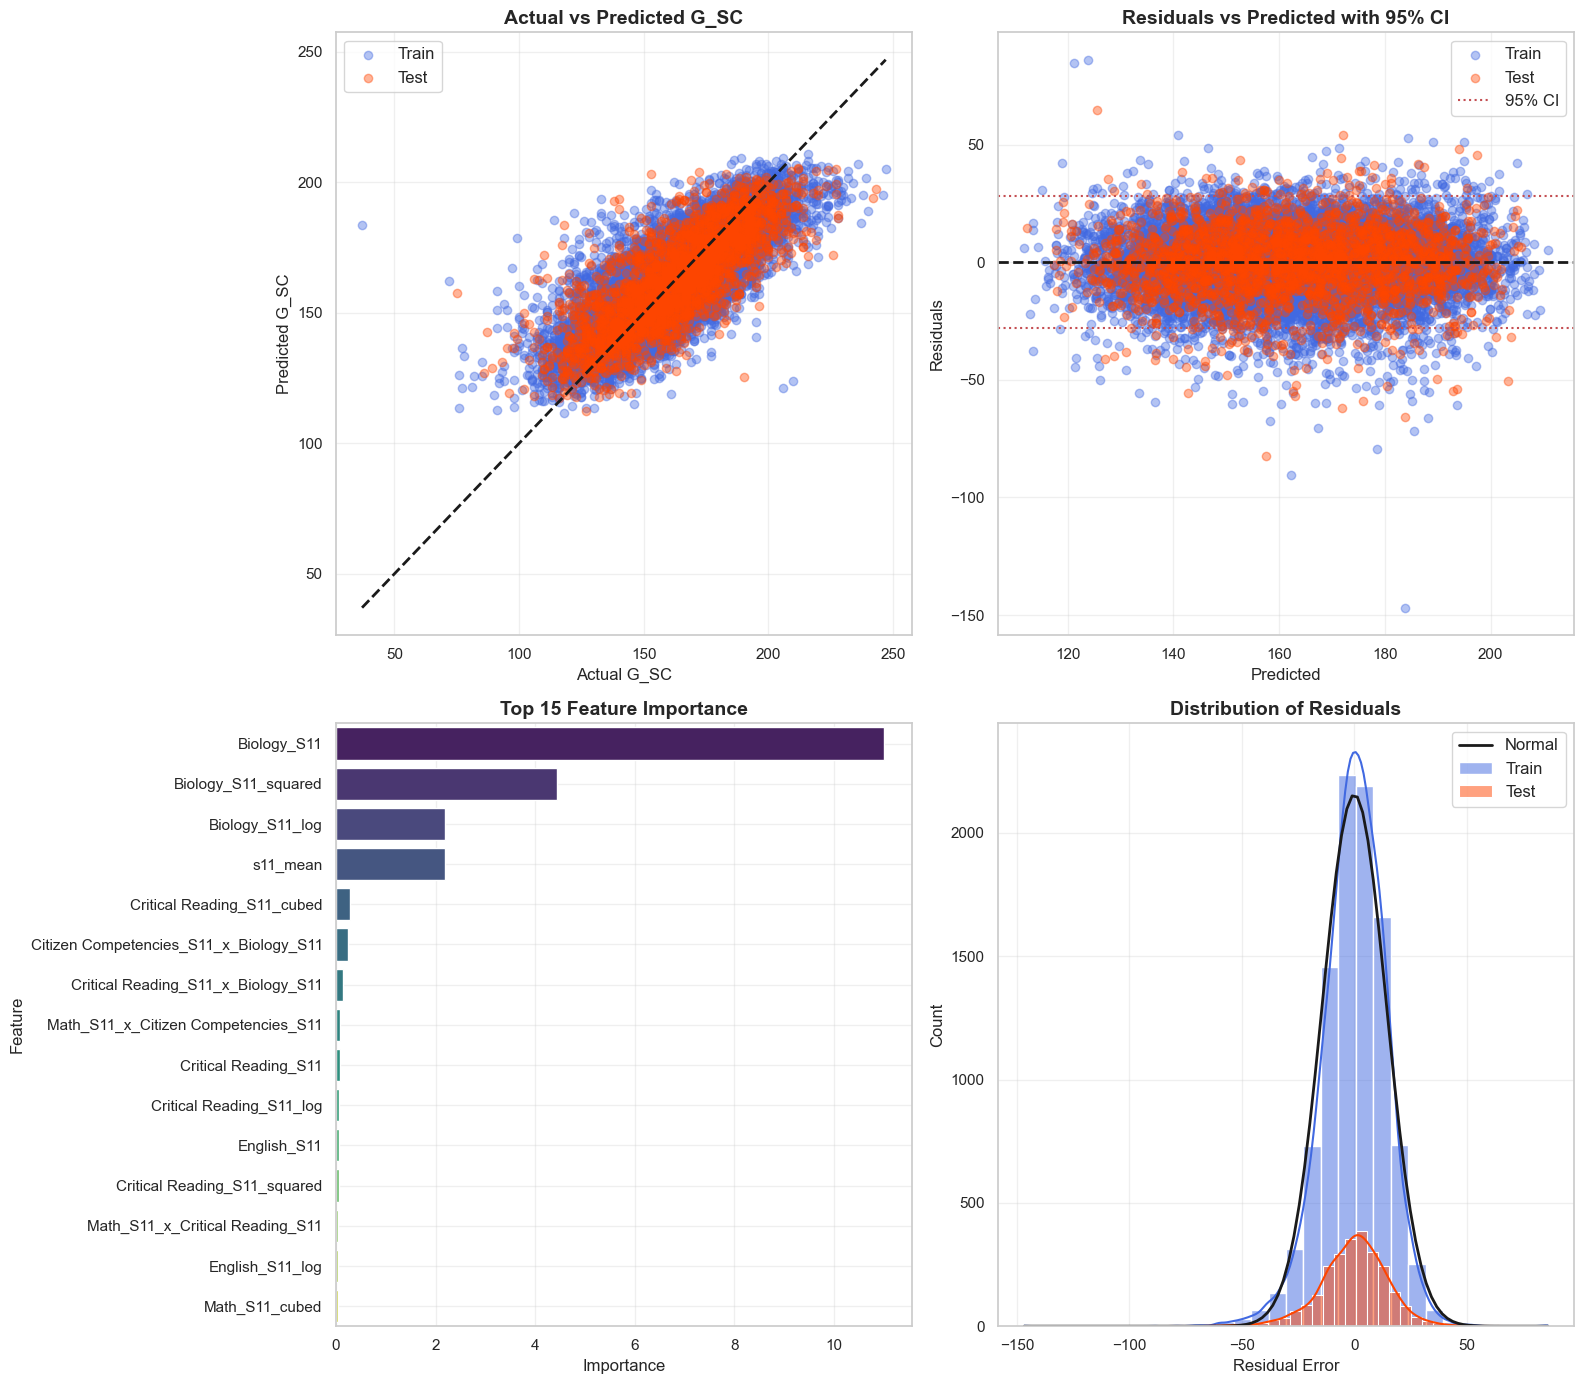

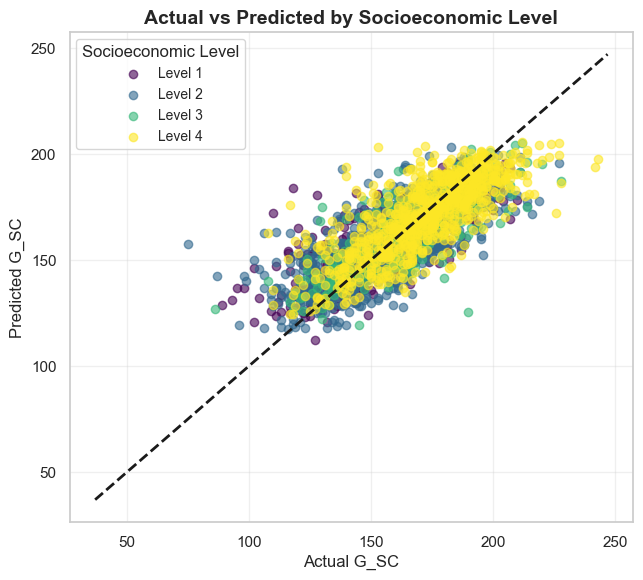

In [30]:
analyze_and_model_g_sc(df)